In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN


In [4]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [5]:
df.drop(['New', 'PendingS', 'fulfilled-by'], axis = 1, inplace=True)

In [6]:
df.drop('index',  axis = 1, inplace=True)

In [7]:
currency_column = 'currency'
df.loc[df[currency_column].isnull(), currency_column] = 'INR'

In [8]:
print(df['ship-city'].unique())
print(df['Category'].unique())

['MUMBAI' 'BENGALURU' 'NAVI MUMBAI' ... 'GULABPURA, Distt BHILWARA'
 'Prayagraj (ALLAHABAD)' 'Halol']
['T-shirt' 'Shirt' 'Blazzer' 'Trousers' 'Perfume' 'Socks' 'Shoes' 'Wallet'
 'Watch']


In [9]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


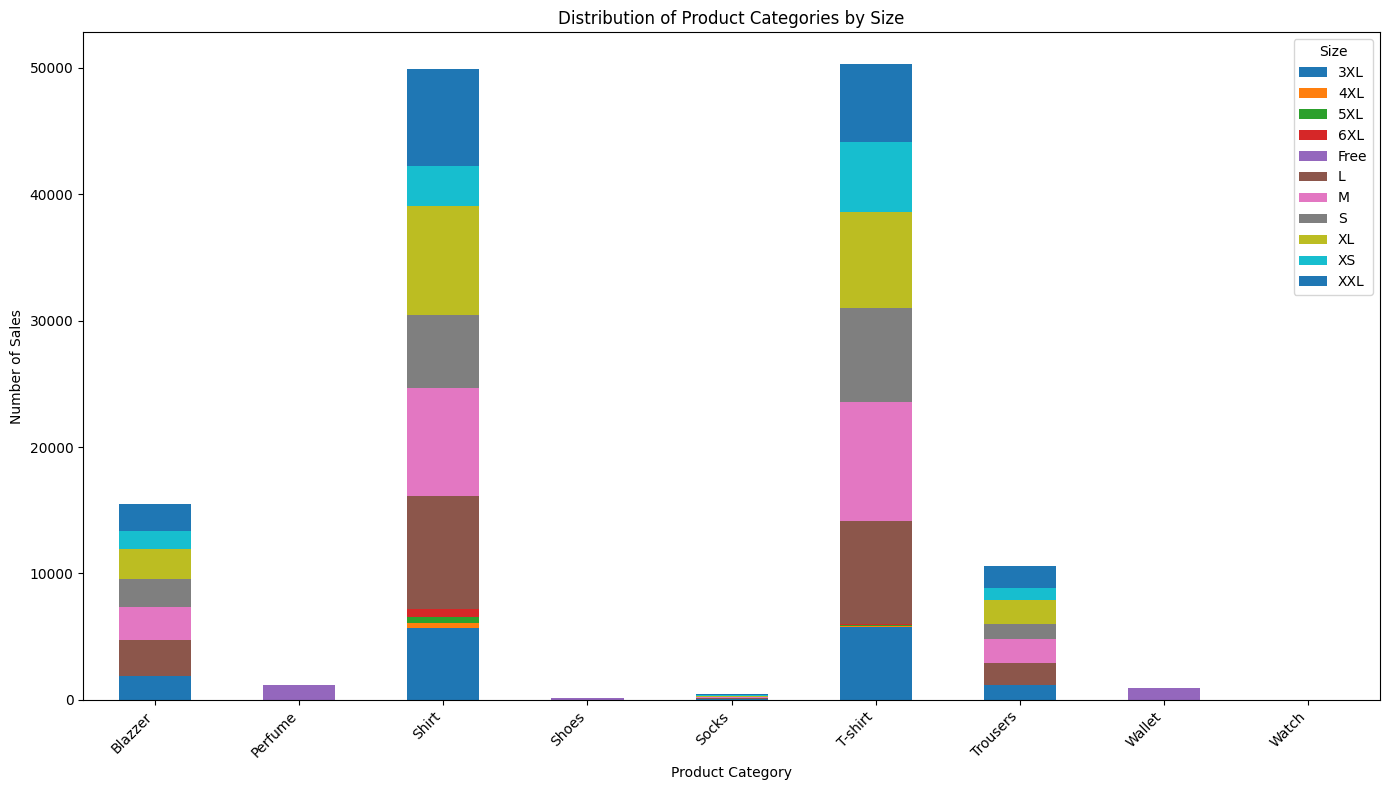

In [10]:
category_size_counts = df.groupby(['Category', 'Size']).size().reset_index(name='Count')

pivot_table = category_size_counts.pivot(index='Category', columns='Size', values='Count').fillna(0)

pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribution of Product Categories by Size')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Size')
plt.tight_layout()
plt.show()

In [11]:
mean_amount = df['Amount'].mean()
df['Amount'].fillna(mean_amount, inplace=True)

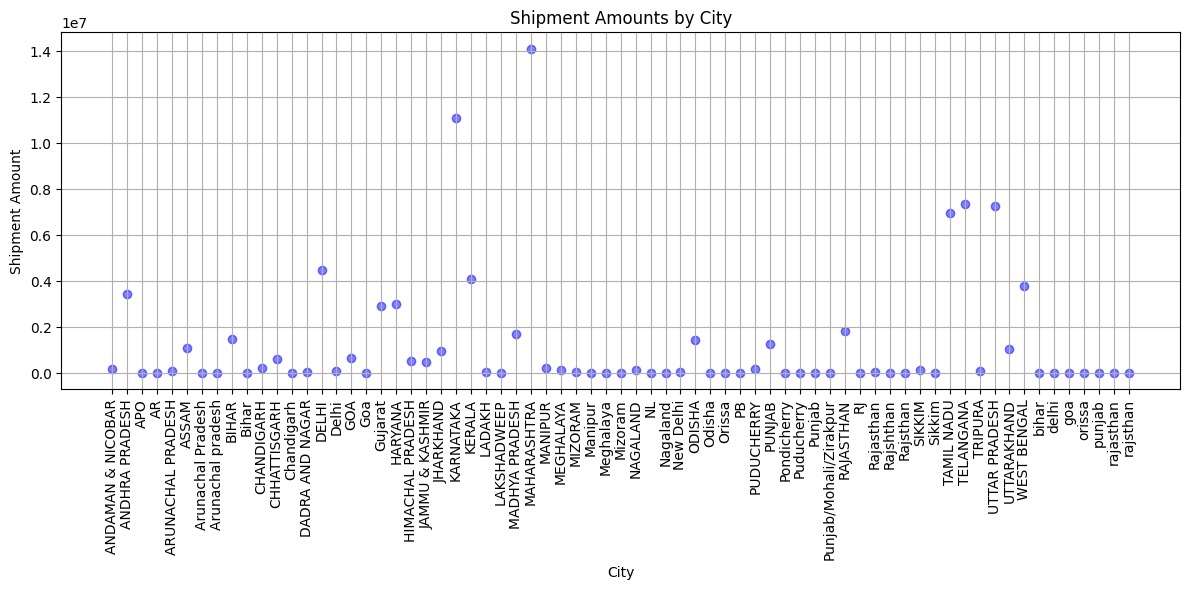

In [12]:
shipment_by_city = df.groupby('ship-state')['Amount'].sum().reset_index()

# Sort the data by city name for plotting
shipment_by_city = shipment_by_city.sort_values('ship-state')

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.scatter(shipment_by_city['ship-state'], shipment_by_city['Amount'], c='blue', alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Shipment Amount')
plt.title('Shipment Amounts by City')
plt.grid(True)
plt.tight_layout()

plt.show()

In [13]:
df['date'] = pd.to_datetime(df['Date'])

df.set_index('date', inplace=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_16220\2255332872.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['Date'])


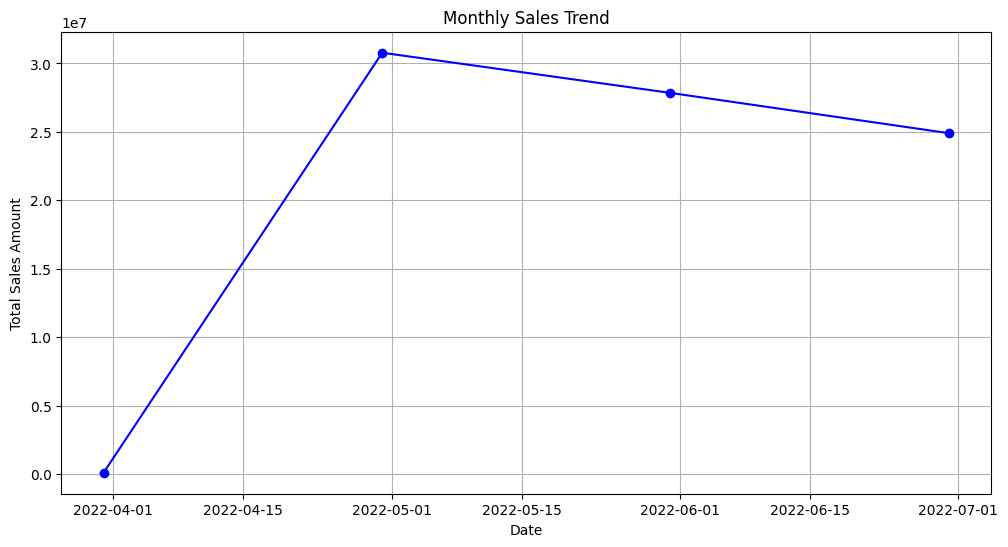

In [14]:
monthly_sales = df['Amount'].resample('M').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()


In [15]:
df['amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# total sales
total_sales = df['amount'].sum()
print(f'Total Sales: ${total_sales:.2f}')


Total Sales: $83648955.22


In [16]:
# Calculate the number of orders
num_orders = df['Order ID'].nunique()  # Assuming 'order_id' is the column for order IDs

# Calculate average order value
average_order_value = total_sales / num_orders
print(f'Average Order Value: ${average_order_value:.2f}')


Average Order Value: $695.75


In [17]:
# Resample the data to monthly sales totals
monthly_sales = df['amount'].resample('M').sum()

growth_rates = monthly_sales.pct_change() * 100  # Percentage change

print('Monthly Growth Rates:')
print(growth_rates)

Monthly Growth Rates:
date
2022-03-31             NaN
2022-04-30    28531.157573
2022-05-31       -9.530791
2022-06-30      -10.570733
Freq: M, Name: amount, dtype: float64


C:\Users\prash\AppData\Local\Temp\ipykernel_16220\3254843169.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='rainbow')


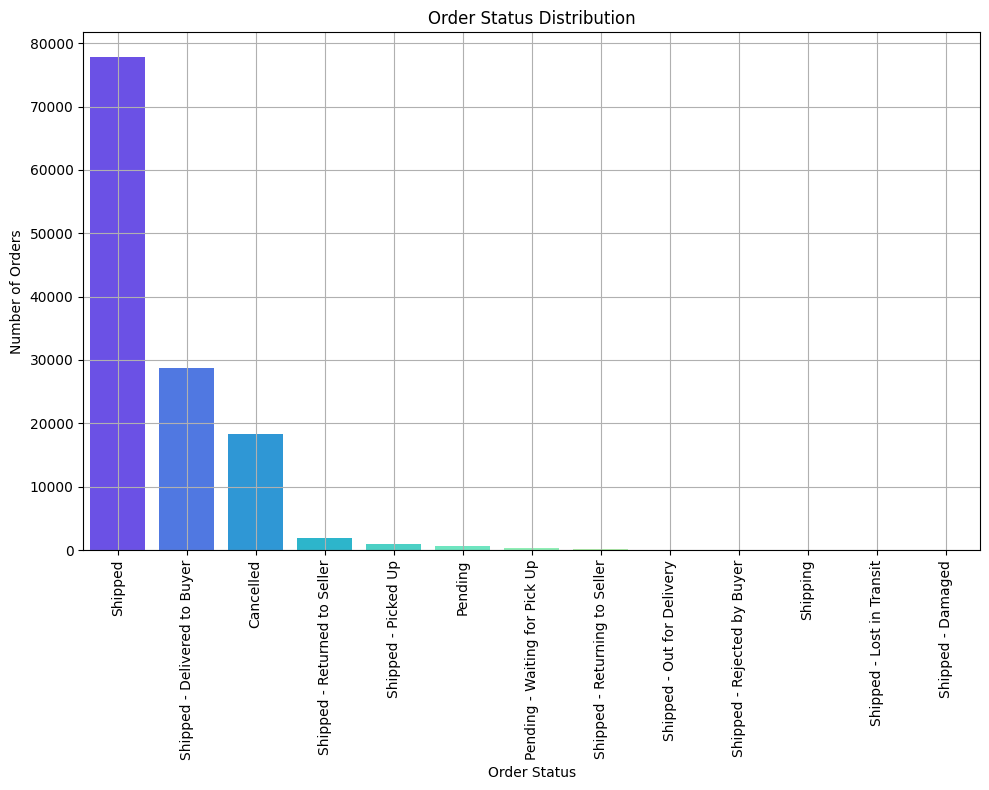

In [18]:
# Count the occurrences of each status
status_counts = df['Status'].value_counts()

# Plot the status distribution
plt.figure(figsize=(10, 8))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='rainbow')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


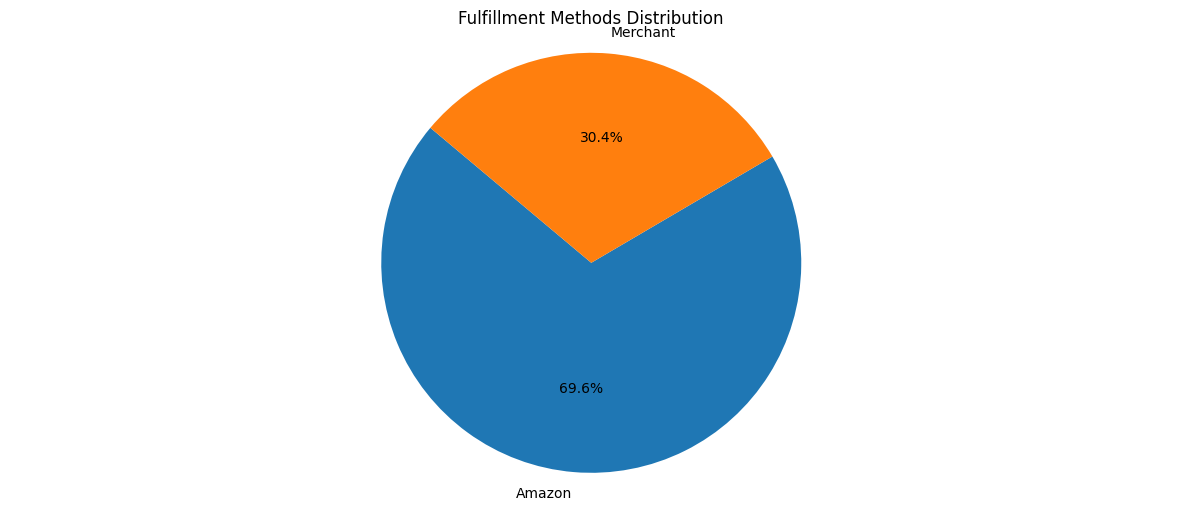

In [19]:
fulfillment_counts = df['Fulfilment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(15, 6))
plt.pie(fulfillment_counts, labels=fulfillment_counts.index, autopct='%1.1f%%', startangle=140 )
plt.title('Fulfillment Methods Distribution')
plt.xticks(rotation=90)
plt.axis('equal')  
plt.show()

C:\Users\prash\AppData\Local\Temp\ipykernel_16220\2058389118.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='rainbow')


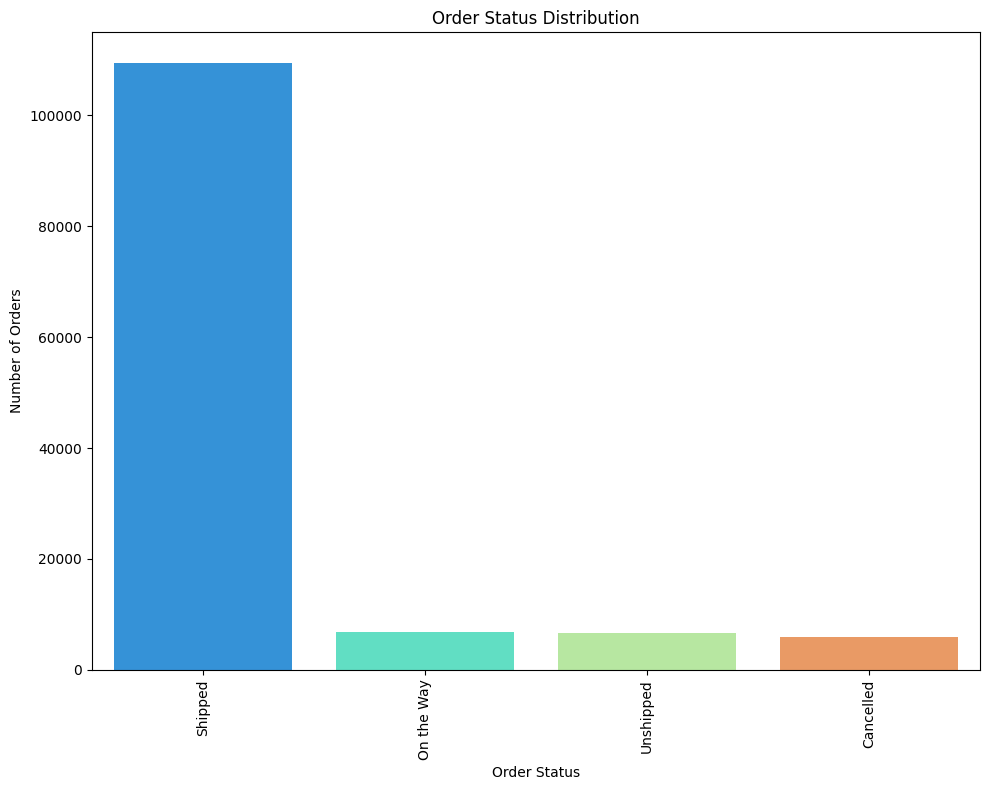

In [20]:
# Count the occurrences of each status
status_counts = df['Courier Status'].value_counts()

# Plot the status distribution
plt.figure(figsize=(10, 8))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='rainbow')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
# plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\prash\AppData\Local\Temp\ipykernel_16220\2292483784.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(sample_df, x='Amount', hue='Courier Status', kind='kde', height=6, aspect=1.5)


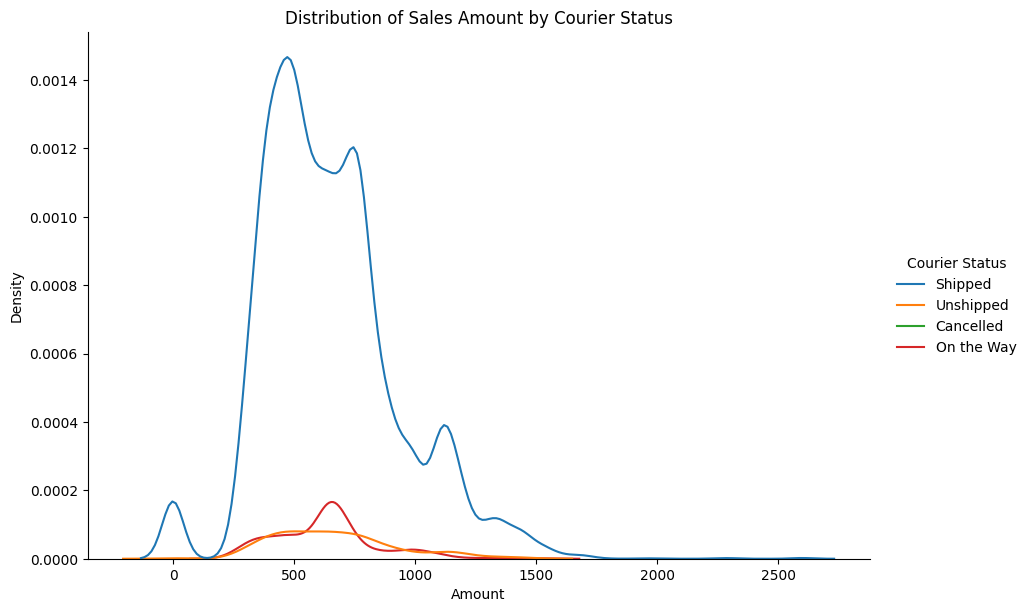

In [21]:
sample_df = df.sample(frac=0.1, random_state=42)  # Adjust the frac value as needed
sns.displot(sample_df, x='Amount', hue='Courier Status', kind='kde', height=6, aspect=1.5)
plt.title('Distribution of Sales Amount by Courier Status')
plt.xlabel('Amount')
plt.ylabel('Density')
# plt.grid(True)
plt.show()

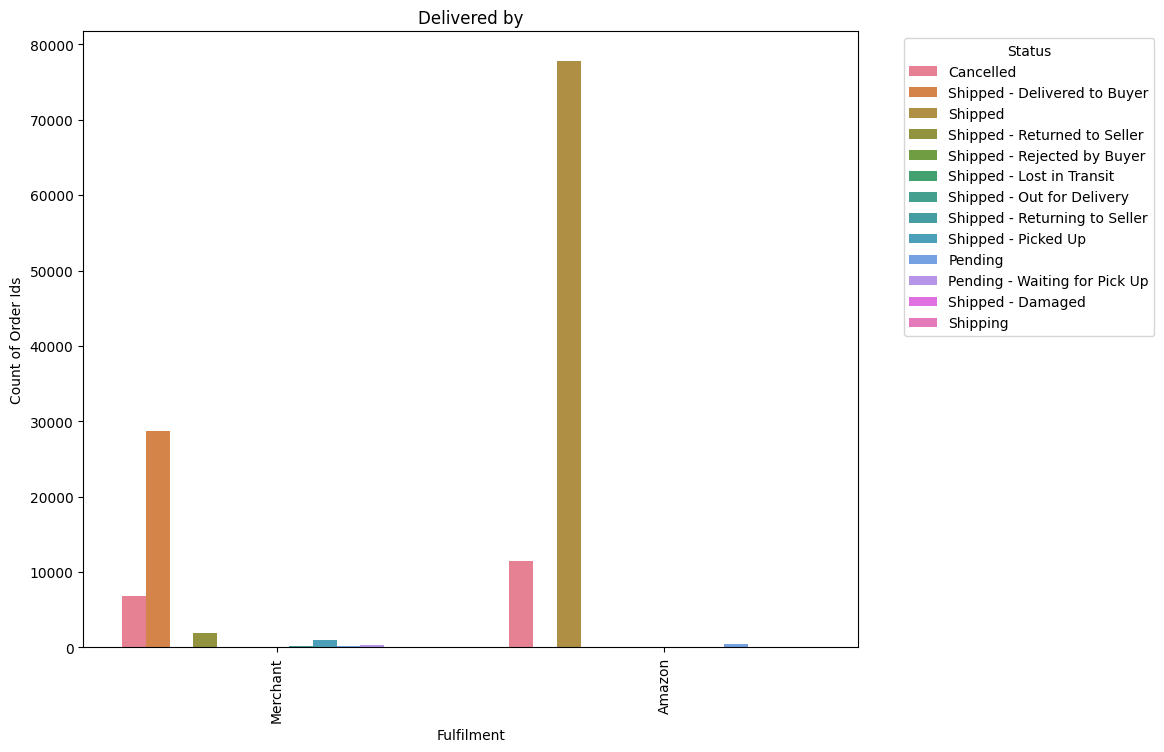

In [22]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='Fulfilment', hue='Status')
plt.xticks(rotation=90)
plt.title('Delivered by')
plt.xlabel('Fulfilment')
plt.ylabel('Count of Order Ids')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [23]:
df.drop(['Date', 'amount'], axis = 1, inplace=True)

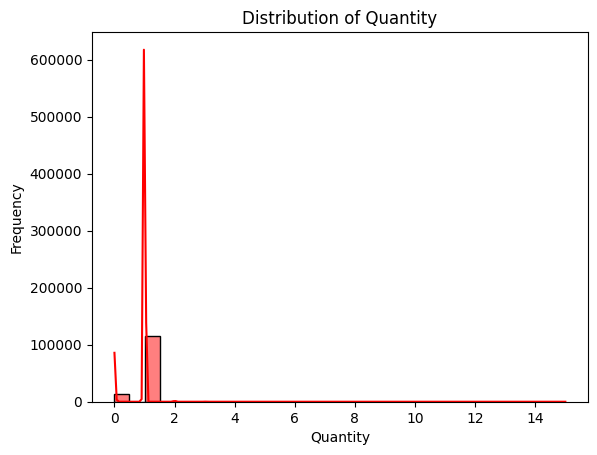

In [24]:
plt.clf()
sns.histplot(df['Qty'], bins=30, kde=True, color = 'Red')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

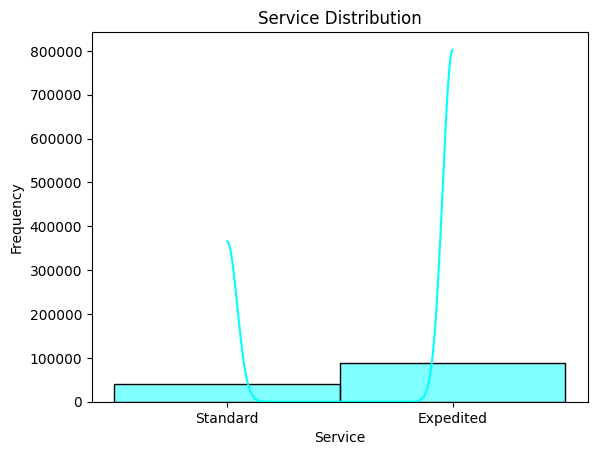

In [25]:
plt.clf()
sns.histplot(df['ship-service-level'], bins=30, kde=True, color='Aqua')
plt.xlabel('Service')
plt.ylabel('Frequency')
plt.title('Service Distribution')
plt.show()

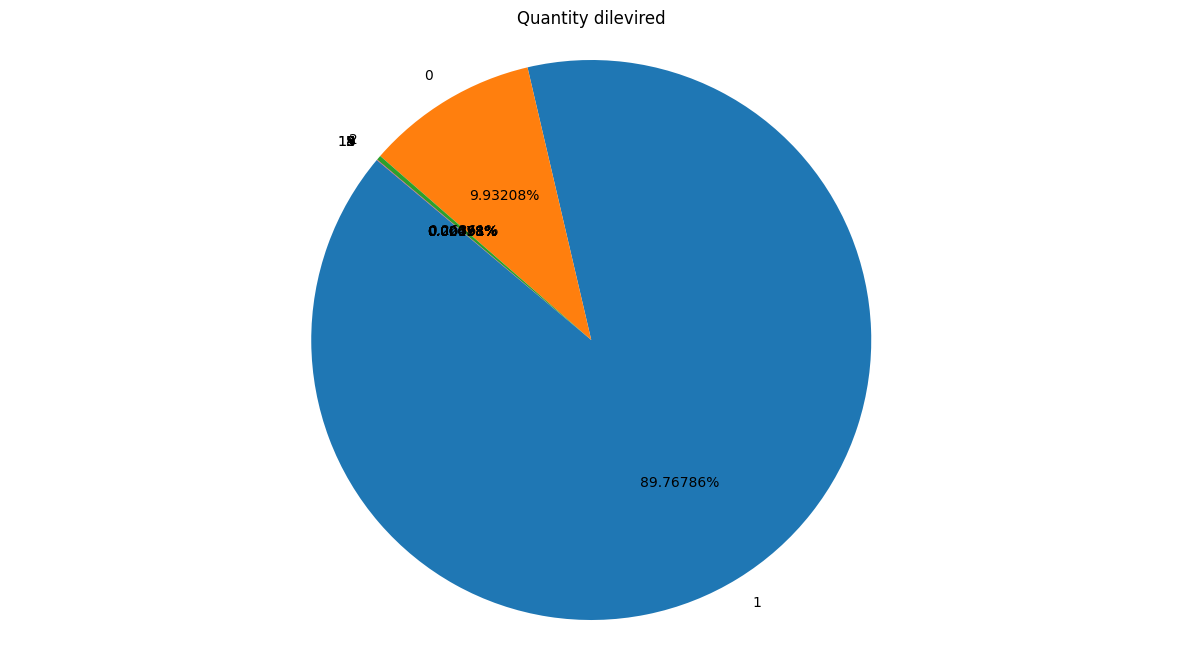

In [26]:
fulfillment_counts = df['Qty'].value_counts()

# Plot the pie chart
plt.figure(figsize=(15, 8))
plt.pie(fulfillment_counts, labels=fulfillment_counts.index, autopct='%5.5f%%', startangle=140 )
plt.title('Quantity dilevired')
plt.xticks(rotation=90)
plt.axis('equal')  
plt.show()

C:\Users\prash\AppData\Local\Temp\ipykernel_16220\256643308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='rainbow')


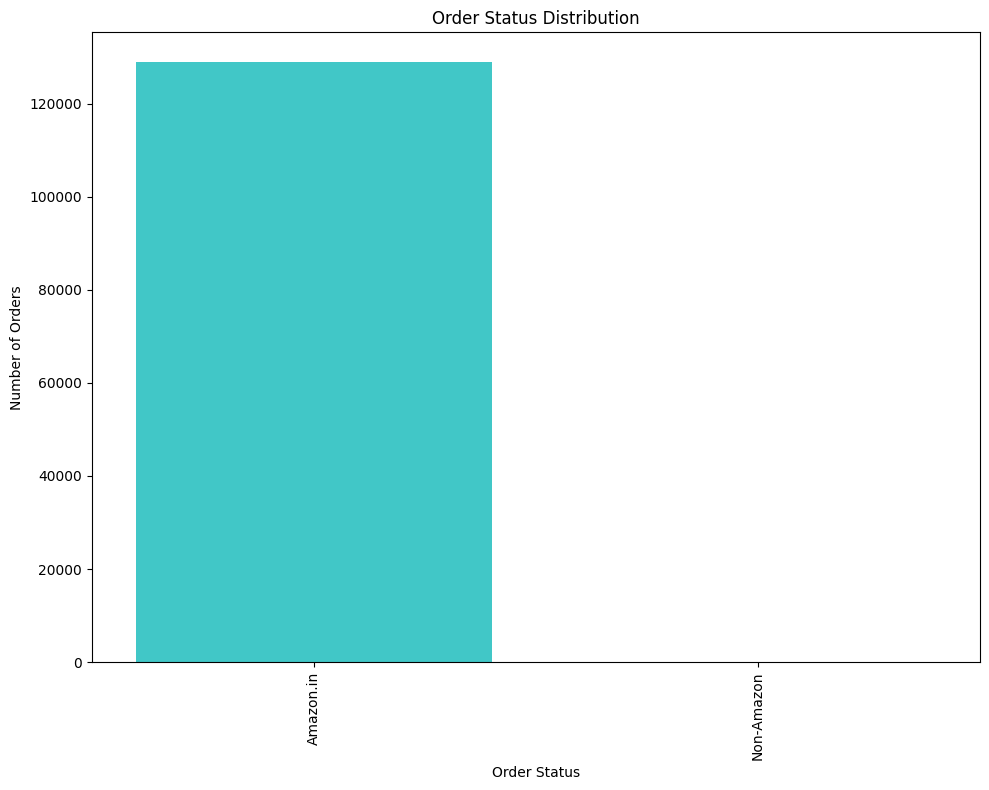

In [27]:
status_counts = df['Sales Channel'].value_counts()

# Plot the status distribution
plt.figure(figsize=(10, 8))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='rainbow')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
# plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\prash\AppData\Local\Temp\ipykernel_16220\1409936631.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Amount', y='Category',palette='magma',data=df)


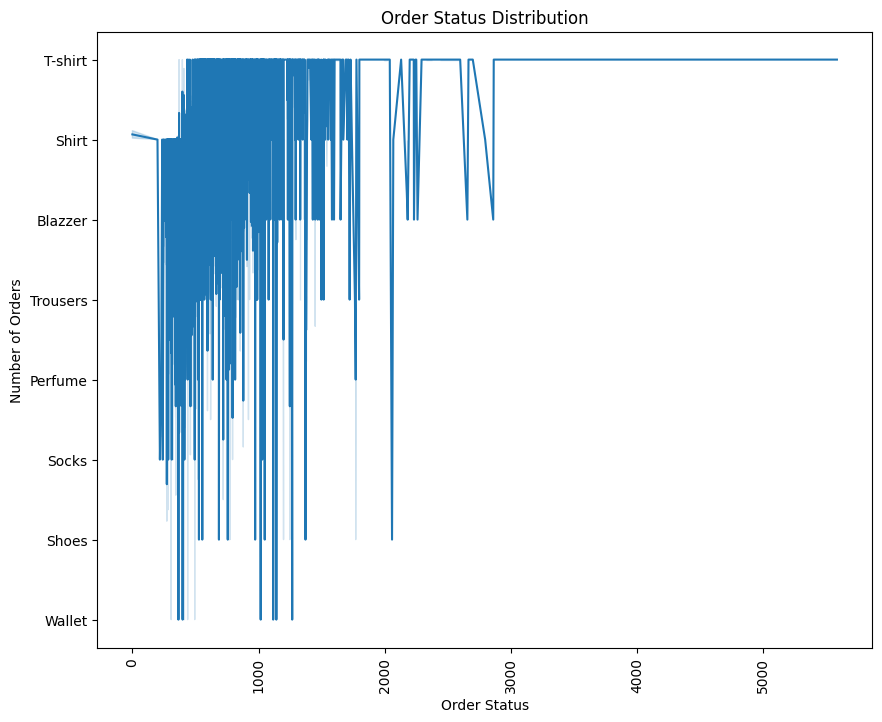

In [29]:
# Count the occurrences of each status
status_counts = df['Courier Status'].value_counts()
plt.figure(figsize=(10, 8))
sns.lineplot(x='Amount', y='Category',palette='magma',data=df)
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
# plt.grid(True)
# plt.tight_layout()
plt.show()

C:\Users\prash\AppData\Local\Temp\ipykernel_16220\2474063552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amount', y='Category',palette='magma',data=df)


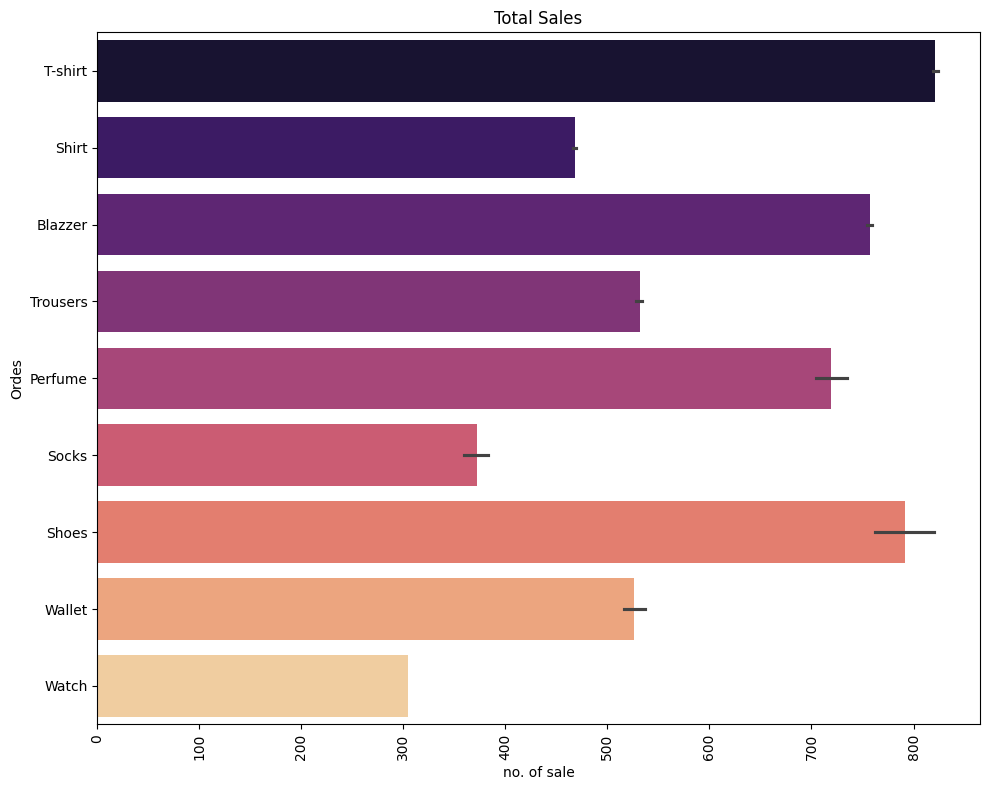

In [32]:
# Count the occurrences of each status
status_counts = df['Courier Status'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x='Amount', y='Category',palette='magma',data=df)
plt.title('Total Sales')
plt.xlabel('no. of sale')
plt.ylabel('Ordes')
plt.xticks(rotation=90)
# plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
df.head(1)

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
date,,,,,,,,,,,,,,,,
2022-04-30,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False


<Axes: xlabel='B2B', ylabel='count'>

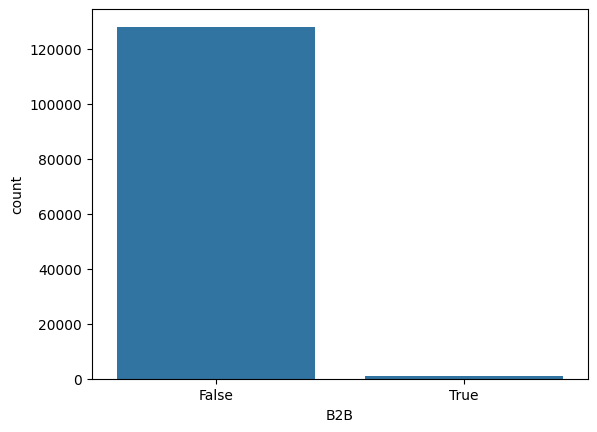

In [36]:
sns.countplot(df, x='B2B')